<font color = green >

# Neural networks

</font>

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from scipy.stats import logistic

<font color = green >

## Home Task
</font>

<font color = green>

### Brest Cancer Dataset

</font>



In [4]:
# https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (569, 30)
y.shape=  (569,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf= MLPClassifier(
    solver= 'lbfgs',
    hidden_layer_sizes= (100,100),
    random_state = 0,
    max_iter=1000
).fit(X_train,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test,y_test)))

train accuracy= 96.948%
test accuracy= 95.105%


<font color = green>

##  Signs dataset

</font>



In [13]:
# signs data set (fingers)
def load_dataset():
    fn =  os.path.join('D:\\study\\homework9\\data' , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join('D:\\study\\homework9\\data' , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes


In [14]:
load_dataset()

(array([[[[227, 220, 214],
          [227, 221, 215],
          [227, 222, 215],
          ...,
          [232, 230, 224],
          [231, 229, 222],
          [230, 229, 221]],
 
         [[227, 221, 214],
          [227, 221, 215],
          [228, 221, 215],
          ...,
          [232, 230, 224],
          [231, 229, 222],
          [231, 229, 221]],
 
         [[227, 221, 214],
          [227, 221, 214],
          [227, 221, 215],
          ...,
          [232, 230, 224],
          [231, 229, 223],
          [230, 229, 221]],
 
         ...,
 
         [[119,  81,  51],
          [124,  85,  55],
          [127,  87,  58],
          ...,
          [210, 211, 211],
          [211, 212, 210],
          [210, 211, 210]],
 
         [[119,  79,  51],
          [124,  84,  55],
          [126,  85,  56],
          ...,
          [210, 211, 210],
          [210, 211, 210],
          [209, 210, 209]],
 
         [[119,  81,  51],
          [123,  83,  55],
          [122,  82,  54],
   

In [15]:
import os
import h5py
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


In [16]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)


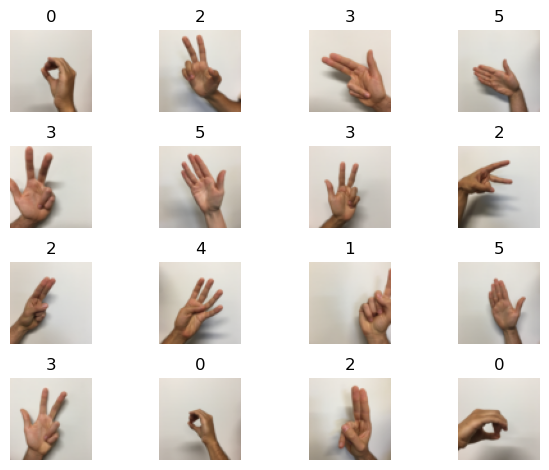

In [44]:
plt.figure()
display_samples_in_grid(X_train, n_rows=4, y= y_train)
plt.show()

In [18]:
fig = plt.gcf()
fig.canvas.manager.set_window_title('Train set')

In [19]:
# Not in use 
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [33]:
m_train, num_px,_,_ = X_train.shape
m_test =  X_test.shape[0]
X_train_flatten = X_train.reshape(m_train, -1)
X_test_flatten =  X_test.reshape(m_test, -1)

X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_train_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))

print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


### Expected result 

```
number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)
```

In [37]:
# X_train,Y_train, X_test, Y_test, classes = load_dataset()
# from sklearn.neural_network import MLPClassifier
# Y_train = np.squeeze(Y_train)
# Y_test = np.squeeze(Y_test)
clf = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=0,
    verbose=True
)
clf.fit(X_train_scaled,Y_train)
train_acc = clf.score(X_train_scaled, Y_train)
test_acc = clf.score(X_test_scaled, Y_test)
print("train accuracy= {:.3%}".format(train_acc))
print("test accuracy= {:.3%}".format(test_acc))   

Iteration 1, loss = 5.29968271
Validation score: 0.175926
Iteration 2, loss = 2.26249078
Validation score: 0.148148
Iteration 3, loss = 1.88372994
Validation score: 0.157407
Iteration 4, loss = 1.78977310
Validation score: 0.259259
Iteration 5, loss = 1.75964555
Validation score: 0.388889
Iteration 6, loss = 1.73906125
Validation score: 0.166667
Iteration 7, loss = 1.69547557
Validation score: 0.259259
Iteration 8, loss = 1.65825535
Validation score: 0.398148
Iteration 9, loss = 1.64954948
Validation score: 0.287037
Iteration 10, loss = 1.60188051
Validation score: 0.398148
Iteration 11, loss = 1.52585103
Validation score: 0.490741
Iteration 12, loss = 1.48644461
Validation score: 0.527778
Iteration 13, loss = 1.44580063
Validation score: 0.361111
Iteration 14, loss = 1.42468426
Validation score: 0.481481
Iteration 15, loss = 1.41239020
Validation score: 0.518519
Iteration 16, loss = 1.37622361
Validation score: 0.472222
Iteration 17, loss = 1.35416305
Validation score: 0.361111
Iterat

### Expected result 

```
train accuracy= 100.000%
test accuracy= 90.000%
```

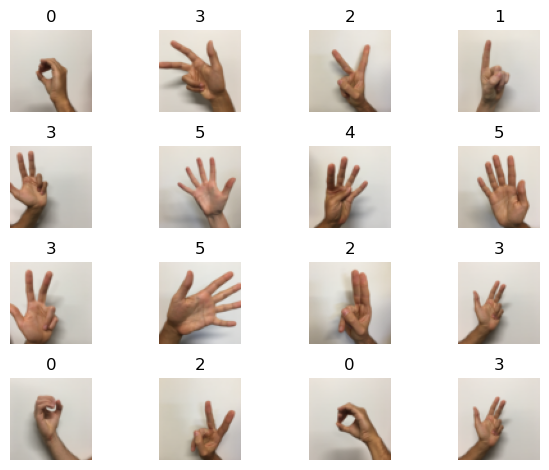

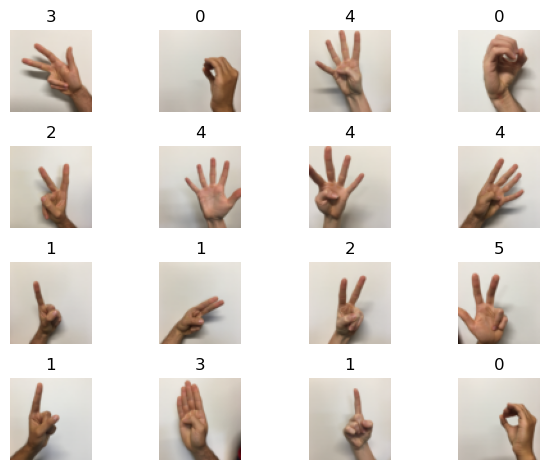

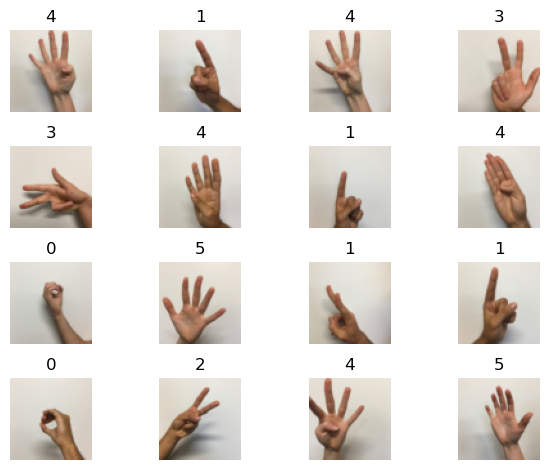

In [43]:
plt.figure()

predicted = clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)
plt.show()

In [40]:
fig = plt.gcf()
fig.canvas.manager.set_window_title('Test set prediction')

### Compare with SVM 

In [41]:
from sklearn.svm import SVC

In [42]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 99.907%
test accuracy= 95.833%
